# Install package

In [1]:
! pip install --quiet vietocr

# Test với pretrain model

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [ ]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
18533it [00:10, 1833.48it/s]
/usr/local/lib/python3.10/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary object

In [ ]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2024-09-26 22:50:03--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   599KB/s    in 0.5s    

2024-09-26 22:50:04 (599 KB/s) - ‘sample.zip’ saved [305969/305969]



In [ ]:
! ls sample | shuf |head -n 5

001085019081.jpeg
deskewed-_2019_10_03_20191003002690_2019100308491067310_4.jpg
457_statuses_74396.jpg
30036.jpg
462_Repurchases_64997.jpg


'VŨ THUỲ NINH'

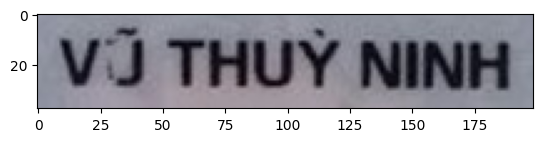

In [ ]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Train với Custom Dataset

In [ ]:
# Di chuyển vào thư mục chứa dữ liệu
%cd /content/drive/MyDrive/Detectron2_Segmentation

/content/drive/MyDrive/Detectron2_Segmentation


In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

## Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:

dataset_params = {
    'name':'invoice_ocr',
    'data_root':'./dataset_vietocr/',
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'val_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [ ]:
# Kiểm tra config
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'invoice_ocr',
  'data_root': './dataset_vietocr/',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'val_annotation.txt',
  'image_height': 32,
  'image_min_width'

In [ ]:
# Train với pretrained model
trainer = Trainer(config, pretrained=True)
# Lưu và load config từ file yml
trainer.config.save('config.yml')

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_invoice_ocr exists. Remove folder if you want to create new dataset


Create valid_invoice_ocr: 100%|█████████████████████████████████| 1300/1300 [07:18<00:00,  2.96it/s]

Created dataset with 1299 samples



valid_invoice_ocr build cluster: 100%|███████████████████████| 1299/1299 [00:00<00:00, 91875.50it/s]


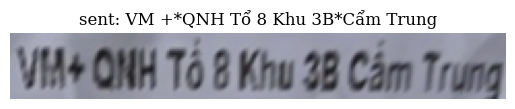

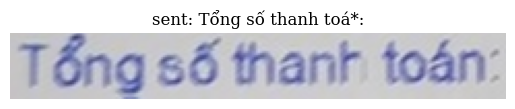

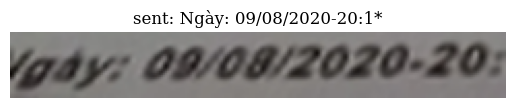

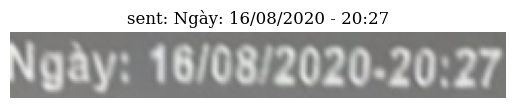

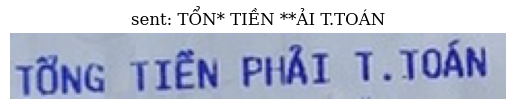

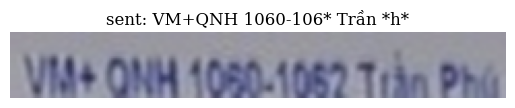

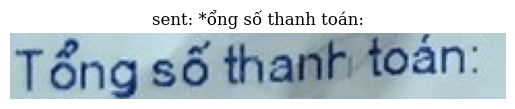

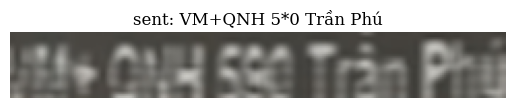

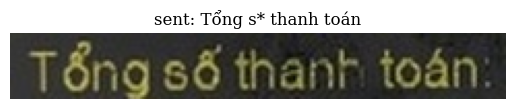

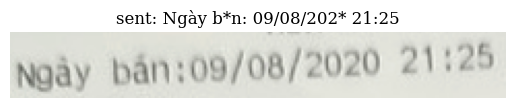

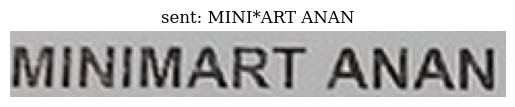

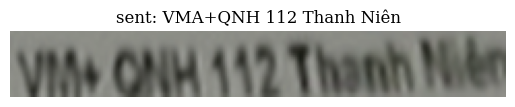

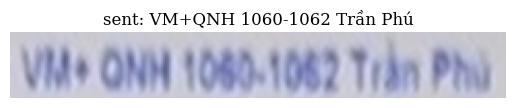

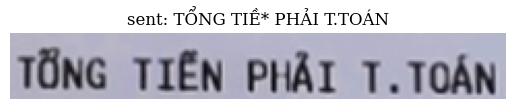

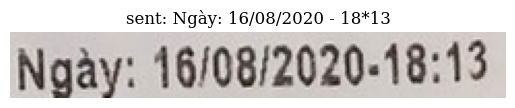

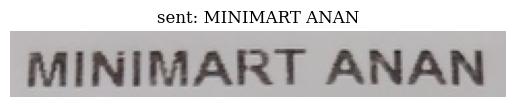

In [ ]:
trainer.visualize_dataset()

In [ ]:
### TRAINING ####
trainer.train()

iter: 000200 - train loss: 0.726 - lr: 1.91e-05 - load time: 0.73 - gpu time: 55.75
iter: 000400 - train loss: 0.620 - lr: 3.95e-05 - load time: 0.87 - gpu time: 54.90
iter: 000600 - train loss: 0.626 - lr: 7.14e-05 - load time: 1.10 - gpu time: 55.76
iter: 000800 - train loss: 0.585 - lr: 1.12e-04 - load time: 0.82 - gpu time: 55.55
iter: 001000 - train loss: 0.580 - lr: 1.56e-04 - load time: 1.19 - gpu time: 54.33
iter: 001200 - train loss: 0.570 - lr: 2.01e-04 - load time: 0.91 - gpu time: 55.49
iter: 001400 - train loss: 0.581 - lr: 2.41e-04 - load time: 0.71 - gpu time: 55.62
iter: 001600 - train loss: 0.549 - lr: 2.73e-04 - load time: 1.29 - gpu time: 56.51
iter: 001800 - train loss: 0.574 - lr: 2.93e-04 - load time: 0.89 - gpu time: 55.12
iter: 002000 - train loss: 0.559 - lr: 3.00e-04 - load time: 1.27 - gpu time: 55.16
iter: 002200 - train loss: 0.544 - lr: 3.00e-04 - load time: 0.86 - gpu time: 54.68
iter: 002400 - train loss: 0.552 - lr: 3.00e-04 - load time: 1.09 - gpu time

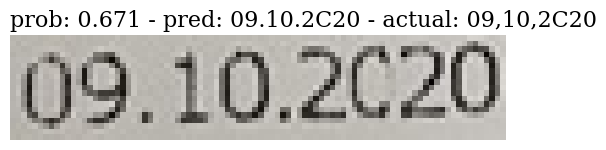

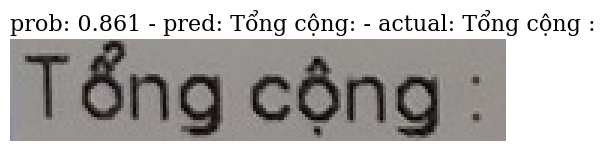

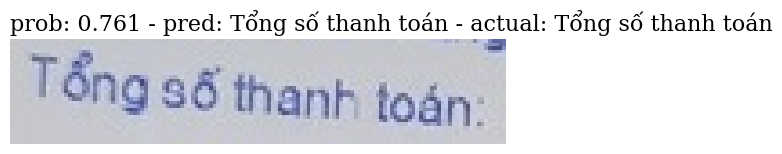

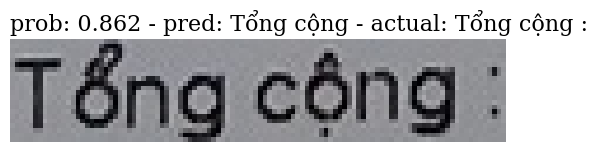

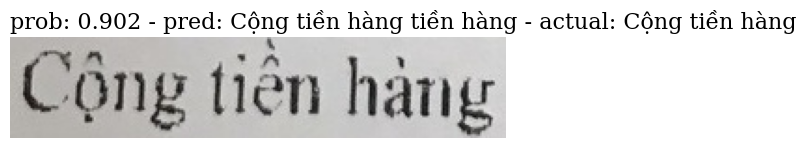

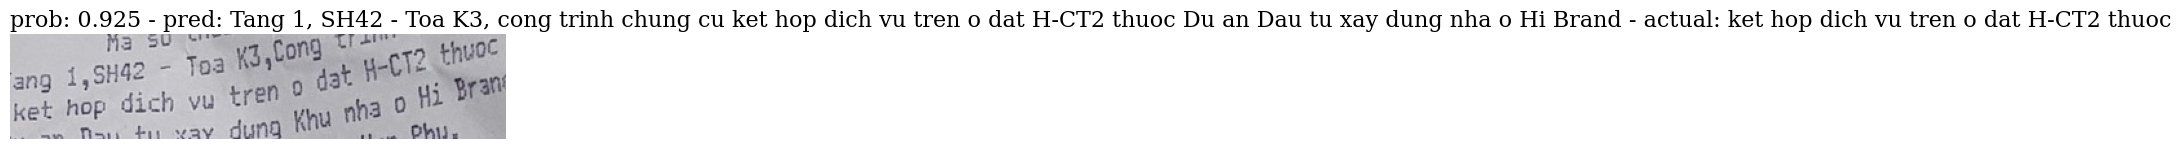

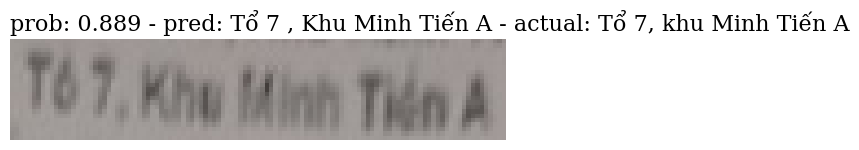

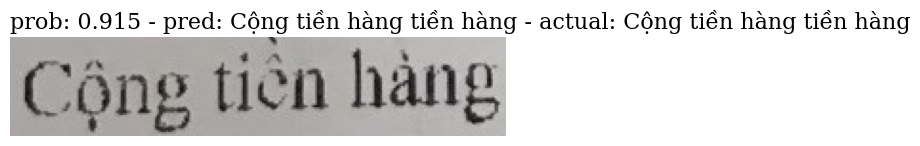

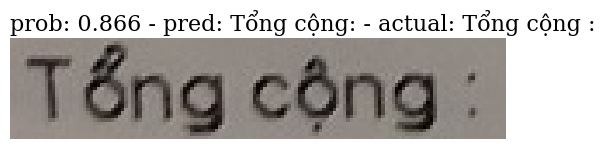

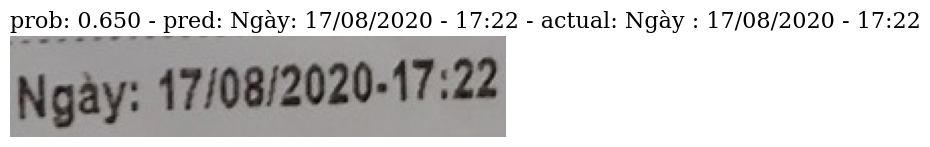

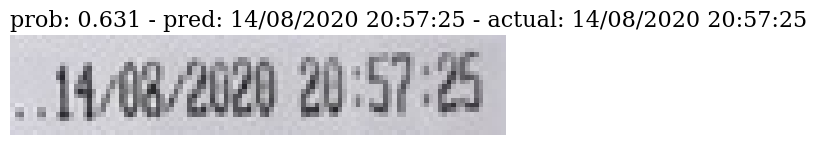

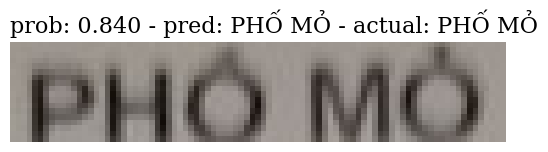

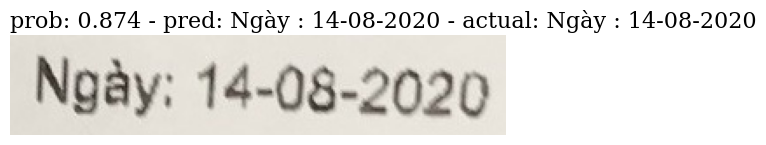

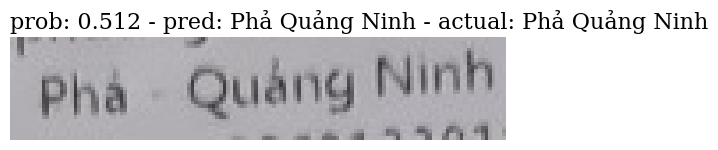

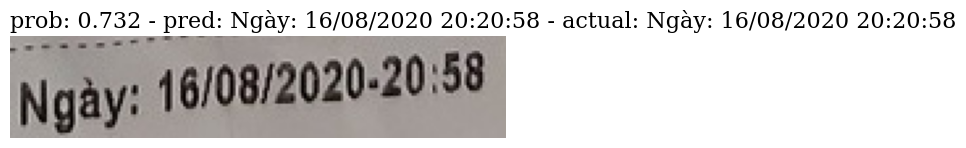

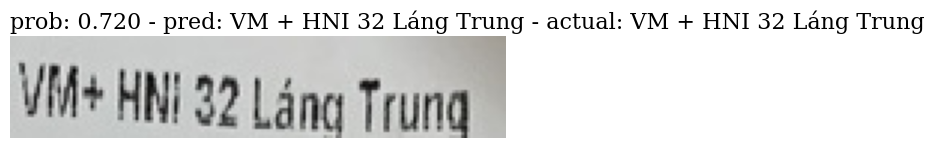

In [ ]:
trainer.visualize_prediction()

In [ ]:
trainer.precision()

(0.6106770833333334, 0.8328126)

# Load and predict with pretrained model


In [2]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00


In [3]:
%cd /content/drive/MyDrive/Detectron2_Segmentation
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

/content/drive/.shortcut-targets-by-id/1X4Q3vOj-zljseKvwopPfnufMIBAPC4Ef/Detectron2_Segmentation


In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

In [9]:
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [10]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed t

In [11]:
img = Image.open('dataset_vietocr/img/mcocr_public_145013aagqw_1.jpg')
s = detector.predict(img)
s

'UNIQLO'